# ANLT-207 TIME SERIES ANALYSIS

# Assingment - 3

__by Arda Ugur__<br>
<a_ugur1@u.pacific.edu>
<br><br/>
__University of the Pacific, School of Engineering and Computer Science<br />
Data Science Graduate Program__<br><br>
__November 2018__

## Questions

_Note: For all problems below: Assume the 'robberies.csv' dataset from Brownlee Chapter 30._

### Question 1:

Perform a complete Box-Jenkins analysis to arrive at what you believe to be the optimum ARIMA(p,d,q) model.

    a. Plot the series.
    b. Perform a Dickey-Fuller test on the series. Is the series stationary?
    c. Plot the ACF & PACF and observe the trends.
    d. Perform differencing on the series.
    e. Is the differenced series stationary?
    f. Plot the ACF & PACF of the differenced data and select the p & q orders.
    g. Run an ARIMA analysis with the original series and the (p,d,q) you've deduced from above.
    h. Plot the residuals.
    i. Plot the residual distribution (kind='kde').
    j. Print the residuals summary. 
    k. Plot the ACF & PACF and observe for residual correlations. 
    l. Compare the model results series to the actuals:
    
          i) Convert the residuals to the series estimated by ARIMA (hint: resids = y - yhat).
         ii) Add back the differencing to compare with the original series.
        iii) Plot the actual and modeled results on the same graph.


### Question 2:

Create a AIC grid search and run 'robberies.csv' through it to find the optimum p,d,q order
What is the optimum p,d,q order? 

### Question 3:

Compare the results of your orginal (p,d,q) estimate to the results from the grid search (p,d,q).

    a. Compare the residuals summaries.
    b. Compare the graphs generated by the script made in 1.l above.

### Question 4:

Forecast 'robberies.csv' based on an ARIMA(2,1,1) model:

Split the series into 75% train, 25% test 

    a. Perform a dynamic forecast for all points in 'test'
        Plot the forecasted data and the prediction intervals on top of the actual data

    b. Perform a rolling forecast for all points in 'test'
        Plot the forecasted data and the prediction intervals on top of the actual data

## Solutions

In [1]:
# FIRST LET US START WITH IMPORTING NECESSARY PYTHON PACKAGES
#
import pandas as pd
import numpy as np
#
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot
from numpy import polyfit
#
%matplotlib inline
#
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
#
from sklearn.metrics import mean_squared_error
from math import sqrt
#
import warnings
warnings.filterwarnings('ignore')

/Users/ardaugur/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# IMPORT RAW DATA
#
series = read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
# ARIMA Forecast: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') 
# with casting rule 'same_kind'
#
# This is already a reported bug on Github
# Use: series = series.astype('float32')
#
series = series.astype('float32')

### Question 1:

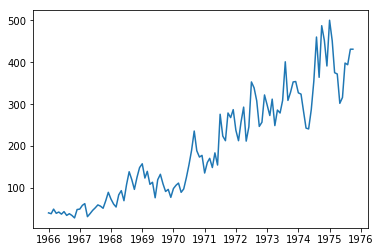

In [4]:
# QUESTION 1a - Plot the series
#
pyplot.plot(series)
pyplot.show()

In [5]:
# QUESTION 1b - Perform a Dickey-Fuller test on the series. Is the series stationary?
#
# Reference Brownlee 15.7 - Sample code
#
X = series.values
result = adfuller(X)
#
# FROM LECTURE NOTES
#
print('\nNumber of data points: ', len(series))
#
print('\nADF Statistic: %f' % result[0])
print('\np-value: %f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


Number of data points:  118

ADF Statistic: 1.001102

p-value: 0.994278

Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


As per Brownlee Ch.15.7 pg. 140 since p-value is greater than 0.05 (p_value $> 0.05$) therefore the series is __not stationary__. 

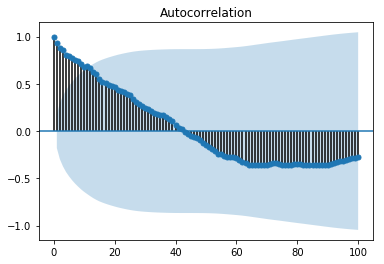

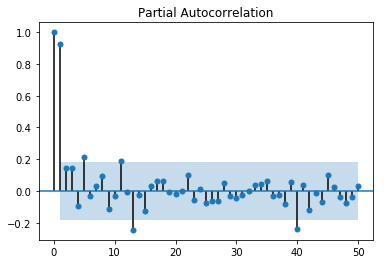

In [6]:
# QUESTION 1c - Plot the ACF & PACF and observe the trends
# 
plot_acf(series, lags = 100)
plot_pacf(series, lags = 50)
pyplot.show()

In [7]:
# QUESTION 1d - Perform differencing on the series
# 
# FIRST LET US REMOVE SEASONALITY AND THEN CHECK SEASONALITY
# 
# REFERENCE: LECTURE NOTES - SLIDE DECK #6
#
# INITILIZE THE SERIES
#
X = series.values
#
diff = list()
#
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

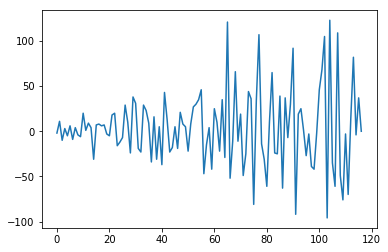


Number of data points:  117


In [8]:
# PLOT THE SERIES AFTER DIFFERENCING
#
pyplot.plot(diff)
pyplot.show()
#
print('\nNumber of data points: ', len(diff))

In [9]:
# CHECK STATIONARY
# APPLY DICKEY-FULLER TEST
#
result = adfuller(diff)
print('\nADF Statistic: %f' % result[0])
print('\np-value: %f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -7.428564

p-value: 0.000000

Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


In [10]:
# QUESTION 1e - Is the differenced series stationary?
#
# Apply Dickey-Fuller Test
#
X = diff
#
result = adfuller(X)
print('\nADF Statistic: %f' % result[0])
print('\np-value: %f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -7.428564

p-value: 0.000000

Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


As per Brownlee Ch.15.7 pg. 140 since p-value is less than 0.05 (p_value $< 0.05$) therefore the series is __stationary__. 

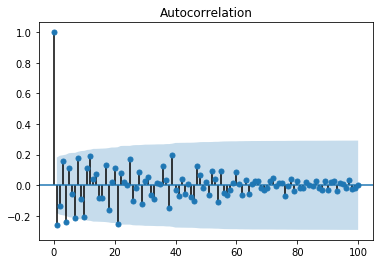

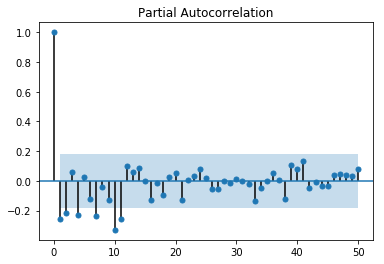

In [11]:
# QUESTION 1f - Plot the ACF & PACF of the differenced data and select the p & q orders
#
plot_acf(diff, lags = 100)
plot_pacf(diff, lags = 50)
#
pyplot.show()

ACCORDING TO AC AND PAC GRAPHS WE CAN OBSERVE THAT: 

    p = 2 (2 peaks before dampening on PACF)
    q = 1 (1 peak before dampening on ACF)
    d = 1 (selected by default)

In [12]:
# QUESTION 1g - Run an ARIMA analysis with the original series and the (p,d,q) you've deduced from above
#
# ACCORDING TO AC AND PAC GRAPHS WE CAN OBSERVE THAT: 
# p = 2 (2 peaks before dampening on PACF)
# q = 1 (1 peak before dampening on ACF)
# d = 1 (selected by default)
#
p = 2
d = 1
q = 1
#
model = ARIMA(series, order = (p,d,q))
model_fit = model.fit(disp=0)

In [13]:
# PRINT MODEL SUMMARY
# 
# REFERENCE: BROWNLEE CH.24.3
#
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Robberies   No. Observations:                  117
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -592.107
Method:                       css-mle   S.D. of innovations             38.118
Date:                Fri, 30 Nov 2018   AIC                           1194.213
Time:                        10:42:17   BIC                           1208.024
Sample:                    02-01-1966   HQIC                          1199.820
                         - 10-01-1975                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.2980      2.539      1.299      0.197      -1.679       8.275
ar.L1.D.Robberies    -0.8811      0.168     -5.235      0.000      -1.211      -0.551
ar.L2.D.Robberies    -0.

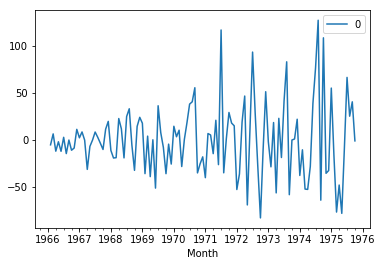

In [14]:
# QUESTION 1h - Plot the residuals
# 
# WE CAN STORE THE RESIDUAL VALUES FROM MODEL FIT FUNCTION 
# INTO A PANDAS DATA FRAME
#
residuals = DataFrame(model_fit.resid)
# 
residuals.plot()
#
pyplot.show()

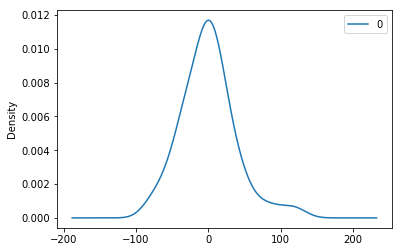

In [15]:
# QUESTION 1i - Plot the residual distribution (kind='kde')
#
# SIMPLY BORROW OUR CODE FROM PREVIOUS BLOCK
# AND CHANGE THE PLOT KIND
#
residuals.plot(kind='kde')
#
pyplot.show()

In [16]:
# QUESTION 1j - Print the residuals summary
#
# WE CAN SIMPLY USE THE DESCRIBE FUNCTION
#
residuals.describe()

,0
count,117.000000
mean,0.002932
std,38.282841
min,-83.077252
25%,-25.757243
50%,-0.239505
75%,18.435419
max,127.310498


<function matplotlib.pyplot.show>

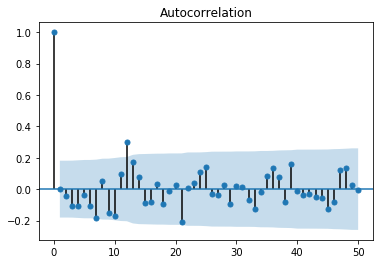

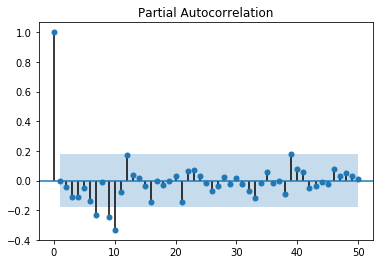

In [17]:
# QUESTION 1k - Plot the ACF & PACF and observe for residual correlations
#
plot_acf(residuals, lags = 50)
plot_pacf(residuals, lags = 50)
pyplot.show

In [18]:
# QUESTION 1l - i: Convert the residuals to the series estimated by ARIMA (hint: resids = y - yhat)
#
# REFERENCE: LECTURE NOTES - SLIDE 6
#
#
resids = model_fit.resid
#
y_hat = list()
for i in range(0, len(resids)):
    value = series[i] - resids[i]
    y_hat.append(value)

In [19]:
len(y_hat)

117

In [20]:
# QUESTION 1l - ii: Add back the differencing to compare with the original series
#
added = list()
#
added.append(diff[0])
#
for i in range(0, len(y_hat)):
    value = y_hat[i] + diff[i]
    added.append(value)

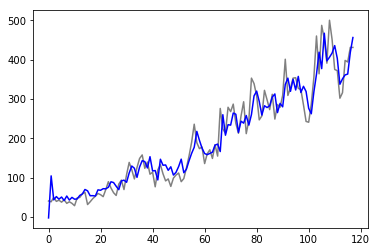

Comparison of the model (blue) to original time series (gray)


In [34]:
# QUESTION 1l - iii: Plot the actual and modeled results on the same graph
#
# The original series
#
pyplot.plot(X, color = 'gray')
# 
# The added series
#
pyplot.plot(added, color='blue')
#
pyplot.show()
#
print('Comparison of the model (blue) to original time series (gray)')

### Question 2:

In [22]:
# QUESTION 2: Create a AIC grid search and run 'robberies.csv' through it to find the optimum p,d,q order
# What is the optimum p,d,q order? 
#
# REFERENCE: Lecture notes - Slide 6, Pg. 16
#
p_values = range(0,7)
d_values = range(0,3)
q_values = range(0,7)
#
best_score, best_cfg = float("inf"), None
#
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            #
            try:
                model = ARIMA(series, order)
                model_fit = model.fit(disp=0)
                AIC = ARIMAResults.aic(model_fit)
                if AIC < best_score:
                    best_score, best_cfg = AIC, order
                print('ARIMA%s AIC=%.3f' % (order, AIC))
            #
            except:
                continue
print()
print("Best: ARIMA%s AIC=%.3f" % (best_cfg, best_score))

ARIMA(0, 0, 0) AIC=1483.025
ARIMA(0, 0, 1) AIC=1370.440
ARIMA(0, 0, 2) AIC=1333.202
ARIMA(0, 0, 3) AIC=1287.209
ARIMA(0, 1, 0) AIC=1205.224
ARIMA(0, 1, 1) AIC=1195.267
ARIMA(0, 1, 2) AIC=1189.947
ARIMA(0, 1, 3) AIC=1191.445
ARIMA(0, 1, 4) AIC=1183.620
ARIMA(0, 1, 5) AIC=1185.307
ARIMA(0, 1, 6) AIC=1186.504
ARIMA(0, 2, 0) AIC=1303.089
ARIMA(0, 2, 1) AIC=1202.619
ARIMA(1, 0, 0) AIC=1218.687
ARIMA(1, 0, 1) AIC=1211.669
ARIMA(1, 0, 2) AIC=1211.484
ARIMA(1, 0, 3) AIC=1213.176
ARIMA(1, 0, 5) AIC=1218.445
ARIMA(1, 1, 0) AIC=1199.151
ARIMA(1, 1, 1) AIC=1184.928
ARIMA(1, 2, 0) AIC=1263.837
ARIMA(2, 0, 0) AIC=1214.296
ARIMA(2, 1, 0) AIC=1195.470
ARIMA(2, 1, 1) AIC=1194.213
ARIMA(2, 2, 0) AIC=1228.646
ARIMA(2, 2, 1) AIC=1193.682
ARIMA(3, 0, 0) AIC=1211.780
ARIMA(3, 0, 1) AIC=1210.067
ARIMA(3, 0, 2) AIC=nan
ARIMA(3, 1, 0) AIC=1197.020
ARIMA(3, 1, 1) AIC=1196.212
ARIMA(3, 2, 0) AIC=1228.152
ARIMA(3, 2, 1) AIC=1195.123
ARIMA(4, 0, 0) AIC=1212.907
ARIMA(4, 0, 1) AIC=1211.985
ARIMA(4, 1, 0) AIC=1192.4

### Question 3:

In [23]:
# QUESTION 3a - Compare the residuals summaries.
# 
# RESIDUALS FROM ESTIMATED ARIMA MODEL FOR p=2, d=1, q=1
#
model1 = ARIMA(series, order = (2,1,1))
model_fit1 = model1.fit(disp=0)
est_residuals = DataFrame(model_fit1.resid)
#
# RESIDUALS FROM GRID SEARCH ARIMA MODEL FOR p=6, d=1, q=3
#
model2 = ARIMA(series, order = (6,1,3))
model_fit2 = model2.fit(disp=0)
gs_residuals = DataFrame(model_fit2.resid)
#
# PRINT RESULTS FROM EACH
#
print()
print(est_residuals.describe())
print()
print(gs_residuals.describe())


                0
count  117.000000
mean     0.002916
std     38.282841
min    -83.077271
25%    -25.757264
50%     -0.239525
75%     18.435398
max    127.310484

                0
count  117.000000
mean    -1.033481
std     34.379642
min    -76.025192
25%    -21.853574
50%     -5.024452
75%     14.589450
max    109.871878


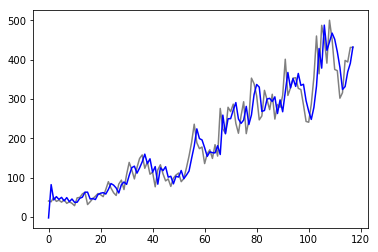

Comparison of ARIMA(2,1,1) model (blue) to original time series (gray)


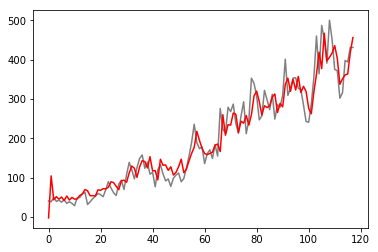

Comparison of AIC Grid Search ARIMA(6,1,3) model (red) to original time series (gray)


In [35]:
# QUESTION 3b - Compare the graphs generated by the script made in 1.l above
#
# SIMILAR TO 1L WE ARE GOING TO FOLLOW A RECONSTRUCTION PROCESS
#
# FIRST LET US COMPARE THE MODEL VS. ORIGINAL TIME SERIES FOR ARIMA(2,1,1)
#
resids = model_fit1.resid
#
y_hat = list()
#
for i in range(0, len(resids)):
    value = series[i] - resids[i]
    y_hat.append(value)
#    
added = list()
#
added.append(diff[0])
#
for i in range(0, len(diff)):
    value = y_hat[i] + diff[i]
    added.append(value)
#
pyplot.plot(X, color = 'gray')
pyplot.plot(added, color='blue')
pyplot.show()
#
print('Comparison of ARIMA(2,1,1) model (blue) to original time series (gray)')
#
# NOW LET US COMPARE THE MODEL VS. ORIGINAL TIME SERIES FOR AIC GRID SEARCH ARIMA(6,1,3)
#
resids = model_fit2.resid
#
y_hat = list()
#
for i in range(0, len(resids)):
    value = series[i] - resids[i]
    y_hat.append(value)
#
added = list()
added.append(diff[0])
#
for i in range(0, len(diff)):
    value = y_hat[i] + diff[i]
    added.append(value)
#
pyplot.plot(X, color = 'gray')
pyplot.plot(added, color='red')
pyplot.show()
#
print('Comparison of AIC Grid Search ARIMA(6,1,3) model (red) to original time series (gray)')
#

### Question 4:

In [25]:
# QUESTION 4 - Split the series into 75% train, 25% test 
# 
# WE WILL USE THIS IN BOTH SECTION A AND B
#
# SPLIT THE DATA
# REFENCE: LECTURE NOTES - SLIDE 7
#
X = series.values
X = X.astype('float64')
size = int(len(X)*.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [26]:
# DEFINE p, d, q VARIABLES
#
p = 2
d = 1
q = 1

In [27]:
# QUESTION 4a - Perform a dynamic forecast for all points in 'test
#               Plot the forecasted data and the prediction intervals on top of the actual data
#
# REFERENCE: LECTURE NOTES - SLIDE 7 - SEE DAILY FEMALE BIRTHS
#
# WE ARE ASKED TO Forecast 'robberies.csv' based on an ARIMA(2,1,1) model
# THEREFORE:
#
model = ARIMA(history, order = (p,d,q))
model_fit = model.fit(disp=0)
#
predictions = model_fit.forecast(steps=len(test))[0]
limits = DataFrame(model_fit.forecast(steps=len(test))[2])
#
lowerlimit = limits[0]
upperlimit = limits[1]
#
predictionint = upperlimit-lowerlimit

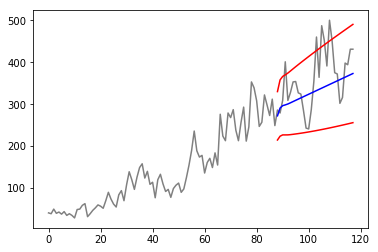

In [28]:
# PLOT PREDICTION DATA
# RECYCLE CODE FROM LECTURE NOTES - SLIDE 7 - PAGE 10
#
pyplot.plot(X, color = 'gray')
pyplot.plot([None for i in train] + [x for x in predictions], color = 'blue')
pyplot.plot([None for i in train] + [x for x in lowerlimit], color = 'red')
pyplot.plot([None for i in train] + [x for x in upperlimit], color = 'red')
#
pyplot.show()


Full prediction interval:


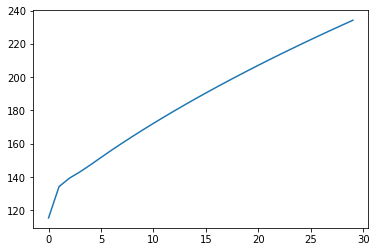

In [29]:
# PLOT PREDICTION INTERVALS
#
print('\nFull prediction interval:')
pyplot.plot(predictionint)
#
pyplot.show()

In [30]:
# QUESTION 4b - Perform a rolling forecast for all points in 'test'
#               Plot the forecasted data and the prediction intervals on top of the actual data
#
# REFERENCE - LECTURE NOTES - SLIDE 7, PAGE 11 - DAILY FEMALE BIRTHS
#
# INITIATE ARRAYS
#
predictions = list()
lowerlimit = list()
upperlimit = list()
predictionint = list()
#
print()
#
for t in range(len(test)):
    #
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    #
    yhat = model_fit.forecast()[0]
    lolim = model_fit.forecast()[2][0][0]
    uplim = model_fit.forecast()[2][0][1]
    interval = uplim - lolim
    #
    predictions.append(yhat)
    lowerlimit.append(lolim)
    upperlimit.append(uplim)
    predictionint.append(interval)
    #
    obs = test[t]
    history.append(obs)
    #
    print('predicted=%f, expected=%f' % (yhat,obs))
#
rmse = sqrt(mean_squared_error(test, predictions))
print('\nTest RMSE: %.3f' % rmse)


predicted=272.288002, expected=286.000000
predicted=298.817199, expected=279.000000
predicted=289.525737, expected=309.000000
predicted=308.059383, expected=401.000000
predicted=364.606487, expected=309.000000
predicted=310.591674, expected=328.000000
predicted=330.552242, expected=353.000000
predicted=344.866382, expected=354.000000
predicted=347.608692, expected=327.000000
predicted=336.462009, expected=324.000000
predicted=337.337424, expected=285.000000
predicted=315.233008, expected=243.000000
predicted=287.444053, expected=241.000000
predicted=279.420111, expected=287.000000
predicted=304.985663, expected=355.000000
predicted=347.327505, expected=460.000000
predicted=419.031840, expected=364.000000
predicted=349.529544, expected=487.000000
predicted=430.019214, expected=452.000000
predicted=427.221261, expected=391.000000
predicted=389.246327, expected=500.000000
predicted=461.709216, expected=451.000000
predicted=457.925254, expected=375.000000
predicted=429.096635, expected=37

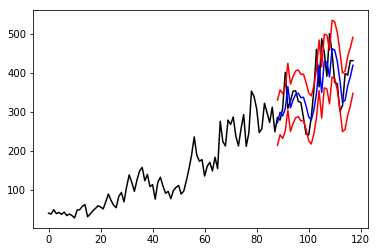

In [31]:
# PLOT PREDICTION DATA
# RECYCLE CODE FROM LECTURE NOTES - SLIDE 7 - PAGE 11
#
pyplot.plot(X, color = 'black')
pyplot.plot([None for i in train] + [x for x in predictions], color = 'blue')
pyplot.plot([None for i in train] + [x for x in lowerlimit], color = 'red')
pyplot.plot([None for i in train] + [x for x in upperlimit], color = 'red')
pyplot.show()


Full prediction interval:


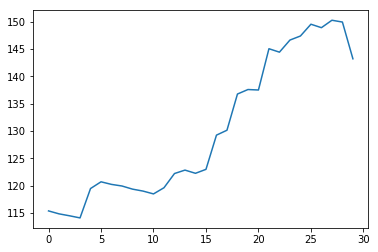

In [32]:
# PLOT PREDICTION INTERVALS
#
print('\nFull prediction interval:')
pyplot.plot(predictionint)
#
pyplot.show()

In [33]:
## end of file ##